<a href="https://www.kaggle.com/code/petermajors/evaluating-offensive-linemen-using-oliz?scriptVersionId=116273712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <font size = '6'> Evaluating Offensive Linemen Using OLIZ: Offensive Linemen Immediate Zone

**<font size = "4"> By: Peter Majors, Chris Orlando, Eitenne Busnel**
    
> **<font size = "4"> Research Performed by the Fordham Sports Analytics Society**

**<font size = "5" color = 'maroon'>Introduction**

<font size = "4"> When a quarterback drops back in the pocket on a passing play, what is the role of the offensive lineman? Generally, it is to keep the pass rusher as far from the quarterback as possible. Doing so, he gives the quarterback enough time, physical space, and peace of mind to complete a pass to an eligible receiver.

<font size = "4"> Below we see a series of combinations between distances of various numbers of pass rushers from a quarterback on the final frame he is deemed to have possession of the football, along with the associated Expected Points Added (EPA) of the play. We see that as the distance decreases and and the number of rushers within that distance increases, offensive performance declines.

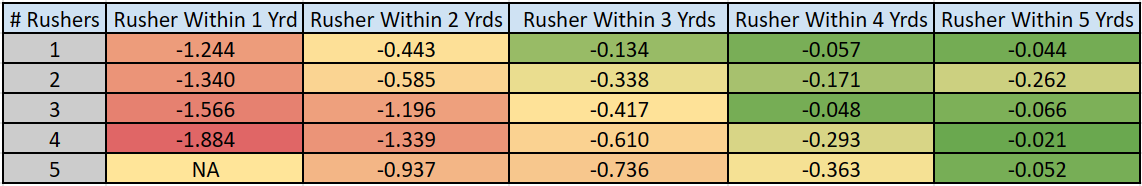

<font size = "4"> Even the mildest of football fans are aware of the relationship between pressure on the quarterback and offensive performance. We aren’t breaking any new ground here. However, what keeps these pass rushers from reaching the quarterback? Well, that would be a series of well fed offensive linemen, patrolling the center, tight end, and guard positions. 
    
<font size = "4"> Classic approaches to offensive linemen performance concern themselves with binary outcomes such as pressures and sacks, as they are easy to understand, but these outcomes can be difficult to predict and subject to human biases. Among pass blockers with 100 snaps in weeks 1-4 and 5-8, hurries allowed and sacks allowed had a <b> Serial Correlation of .32 and .25 </b>. So while sacks are hurries are high impact plays in terms of EPA, their predictive value is suspect. 
    
<font size = '4'> With this in mind, we decided to investigate, neither sacks nor hurries, but something present in nearly every play: **rusher distance from the quarterback at the end of posession**, and its impact on EPA as well as predicitve value for sacks and hurries.

**<font size = '5' color = 'maroon'> Our Proposal**

<font size = "4"> For this year’s Big Data Bowl, we set out to determine the performance of offensive linemen as it pertains to their ability to keep the pass rusher as far as possible from the quarterback at the final moment of the quarterback’s possession of the football. Before proceeding, let’s lay the groundwork for our analysis. Below are the considerations used to determine which plays were selected for our analysis.
    
- <font size = "4"> All Passing Plays, First 8 Games Of The 2021 NFL Season
   
- <font size = '4'> First Block By Each Pass Blocker Against A Known Pass Rusher
- <font size = '4'> Excluding Block Types “Backfield Help”, “Chip Block”, “No Block”, and “Set & Release”
- <font size = '4'> Excluding Non-Traditional Quarterback Drop Backs (Designed Rollouts, Scramble Rollouts, etc.)
- <font size = '4'> Blocks Performed By Left Tackles, Left Guards, Centers, Right Guards, and Right Tackles 
- <font size = '4'> Time Between Ball Snap And End Of QB Posession (Ball Release, Run, Strip Sack, Sack)
    

<font size = '4'> To determine when an offensive lineman was engaged with their pass rusher, we created a orientation responsive “immediate zone” in front of each pass blocker, designated as their <b> OLIZ </b>, or <b> “Offensive Lineman Immediate Zone” </b>. The OLIZ shifts with the pass blocker’s shoulder orientation at each frame, reaches 1.5 yards in front of them, and spans 1 yard to their left and right. We found that 1.5 yards is the distance in front of a pass blocker where the momentum (speed and acceleration) of an oncoming pass rusher is lowest.

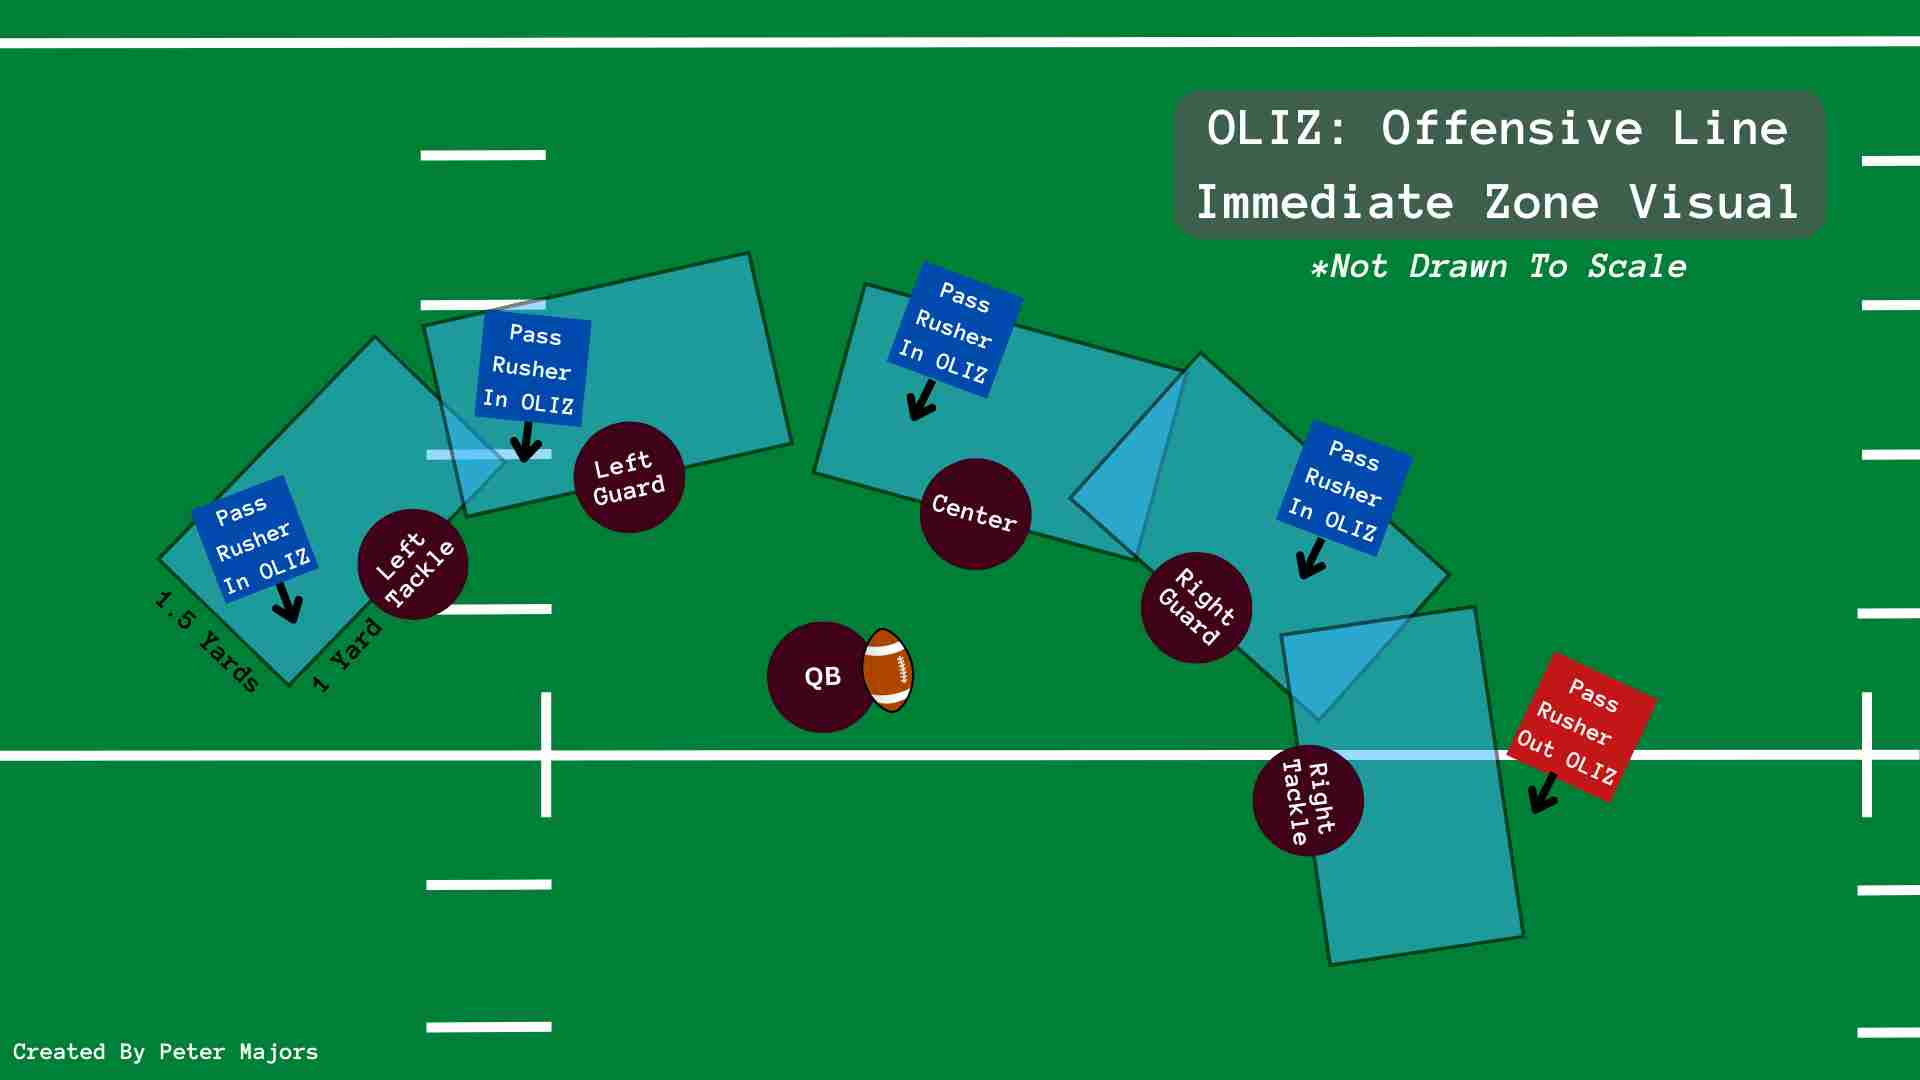

<font size = "4"> OLIZ only considers the first rusher a pass blocker was designated as blocking in each play, as the provided data only specified the first block performed by each player in a play. It cannot consider double teams, that being the added benefit a pass blocker would receive from a teammate assiting them against a single pass rusher. Using OLIZ, we calculated metrics relevant to the performance of an offensive lineman against a single pass rusher in keeping them as far away as possible from the quarterback. 
    
<font size = "4"> In designing these questions, we wanted to isolate the interactions between blockers and rushers. Our goal was not to predict how close rushers would eventually be - but to determine how much influence offensive lineman have on that final figure. Each question corresponds to one feature in our model.

**<font size = "5" color = 'maroon'> Questions Considered When Designing Model Features**

- <font size = "4"> How Well Can The Blocker Hold Their Ground? 
    
- <font size = "4"> How Long Can The Blocker Stay Engaged With The Pass Rusher?
    
- <font size = "4"> How Long Can The Blocker Stay Between The QB Than The Pass Rusher?

- <font size = "4"> What Is The Direction Of The Rusher Relative To The Orientation Of The Blocker Coming Into The Block?

- <font size = "4"> How Well Can The Blocker Maintain Similar Shoulder Orientation To The Rusher? 
    
- <font size = "4"> How Well Can The Blocker Slow The Rusher As They're Leaving The Immediate Zone? 

- <font size = "4"> If The Blocker Loses Control of The Pass Rusher, How Well Can They Recover?

**<font size = "5" color = 'maroon'>Modeling**


<font size = "4"> Given the different needs of in inside and outside linemen, we trained one model for guards and centers, and another one for tackles. We selected Extreme Gradient Boosted (XGBoost) Regression to optimize the weights of our model and output the predicted distance of rushers from the quarterbacks at the final moment they had "posession" of the football.

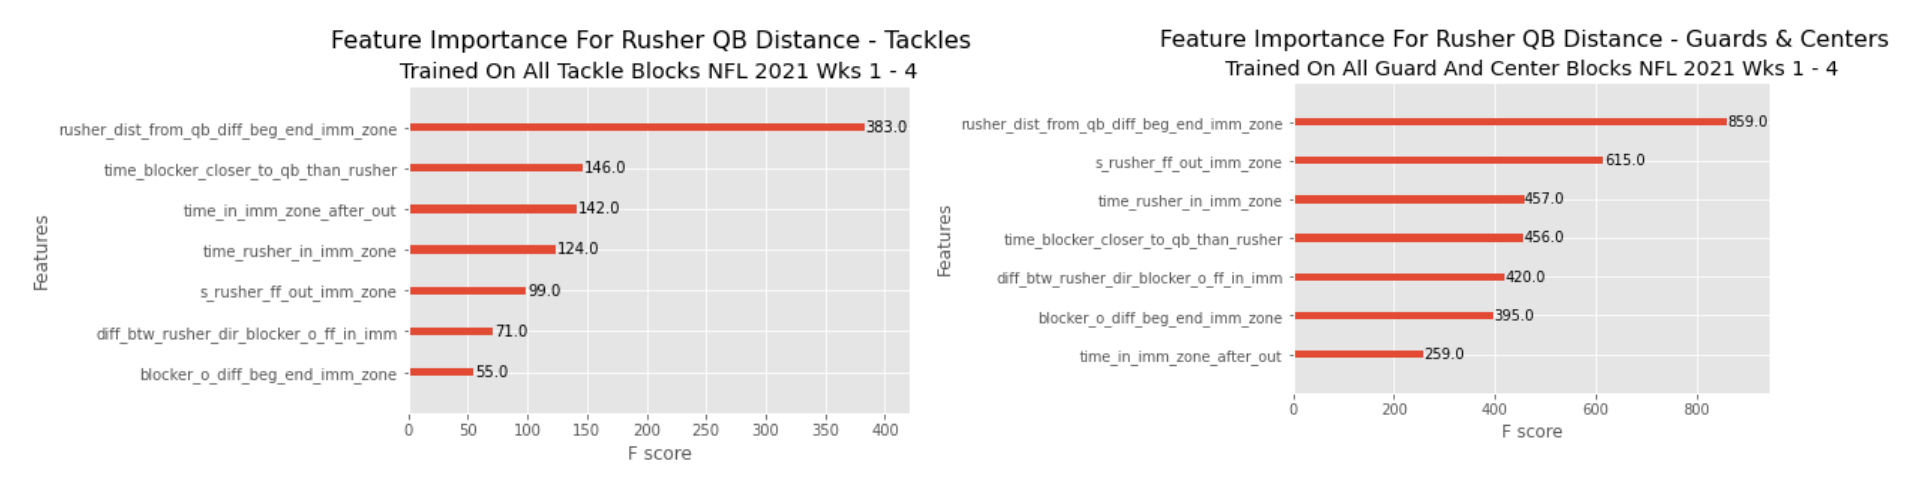


<font size = "4"> As you can see, interior and exterior offensive linemen respond quite differently to the selected features. 
    
<font size = "4"> On the training data for guards and centers, the difference in rusher distance from the quarterback at the beginning and end of the OLIZ is clearly the most important feature. Given the nature of play on the interior line, it makes sense that being able to hold one's ground matters a ton for pass blockers. We also noticed that the time kept in the OLIZ was far more important for guards and centers than tackles. On the test set for guards and centers, the model achieved a <b> 1.27 RMSE (Yards) </b> and a <b> Pearson R Correlation of .72 </b>, suggesting that 52% of the variation in actual yards from the quarterback at the end of "possession" can be explained by interactions in and around the OLIZ.
      
<font size = "4"> Looking at the feature importances for tackles, we see that rusher distance from the start to the end of the immediate zone is similarly important. However, we noticed that time the blocker kept himself between the quarterback and the rusher, as well as rusher time in the immediate zone after initially leaving were more important metrics for tackle success. It is no wonder staying in front of your man and resecuring coverage is important for pass blocking, but now we have the model to back those up. Against the test set for tackles, our model achieved a far more promising <b> RMSE of 1.13 (Yards) </b> with a <b> Pearson R Correlation of .81 </b>, suggesting the 66% of the variation can be explained by our model.

**<font size = "5" color = 'maroon'> Evaluation**
    

<font size = "4"> On a team-by-by team basis, we see very promising results when comparing actual and predicted rusher yards from quarterback at the final moment the play. Below, the guards/center and tackle scatterplots show a  <b> .62 and .71 Pearson R </b> correlation, respectively. Here, it is better for a team to be towards the top-right, since that means their offensive linemen prevented rushers from being closer to the QB.
    
<font size = "4"> Note: The below graphs only include predictions on Weeks 5-8 of the data, as no predictions were made on weeks 1-4 to prevent model leakage.
    
  

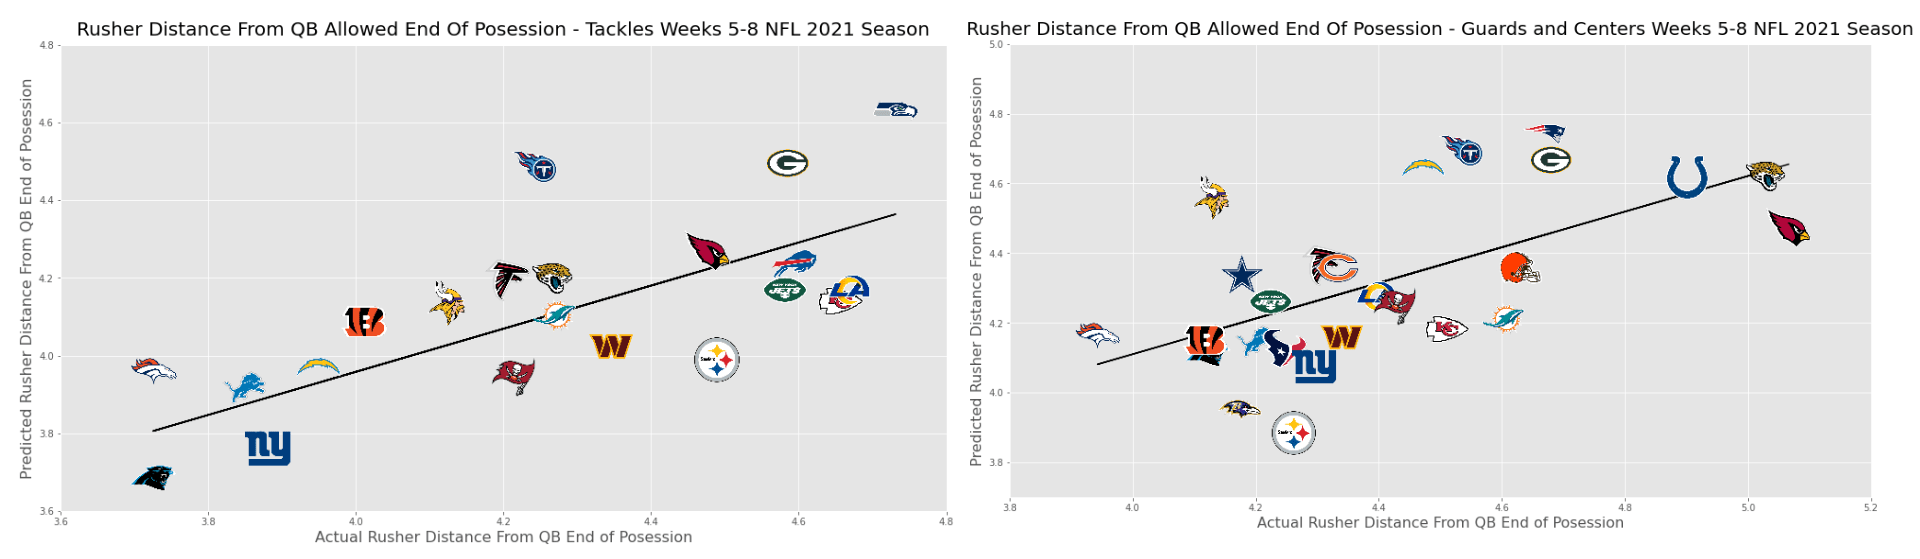

<font size = "4"> Below we see the top 10 guards, rushers, and tackles at keeping rushers away from their quarterabcks in Weeks 5-8 of the 2021 NFL season, as predicted by their performance in Weeks 1-4. As you can see, these don't line up as the "best" offensive linemen at their positions, but that wasn't entirely our goal. 

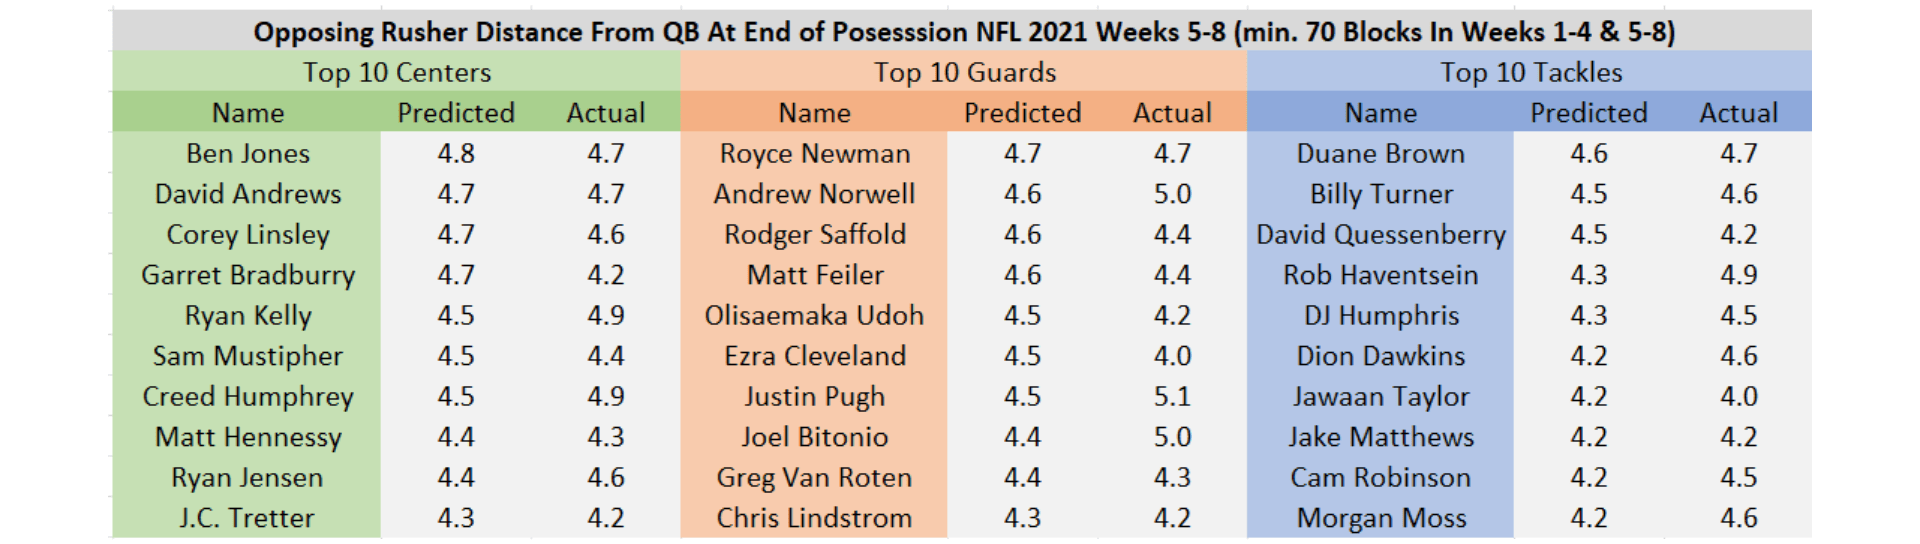

<font size = '4'> Our goal was to determine the impact of using OLIZ - or a similar tool - to determine distance from the quarterback, and subsequently sacks and hurries. Despite the predictive power of the OLIZ model for tackles and hurries on the test set as a whole, individual player statistics paint a slightly weaker picture. In a four week sample, statistics and matchups can be volatile - but our model still performs noticeably better than existing metrics. If run with more data, we are confident the rankings for the above pass blockers would change dramatically.

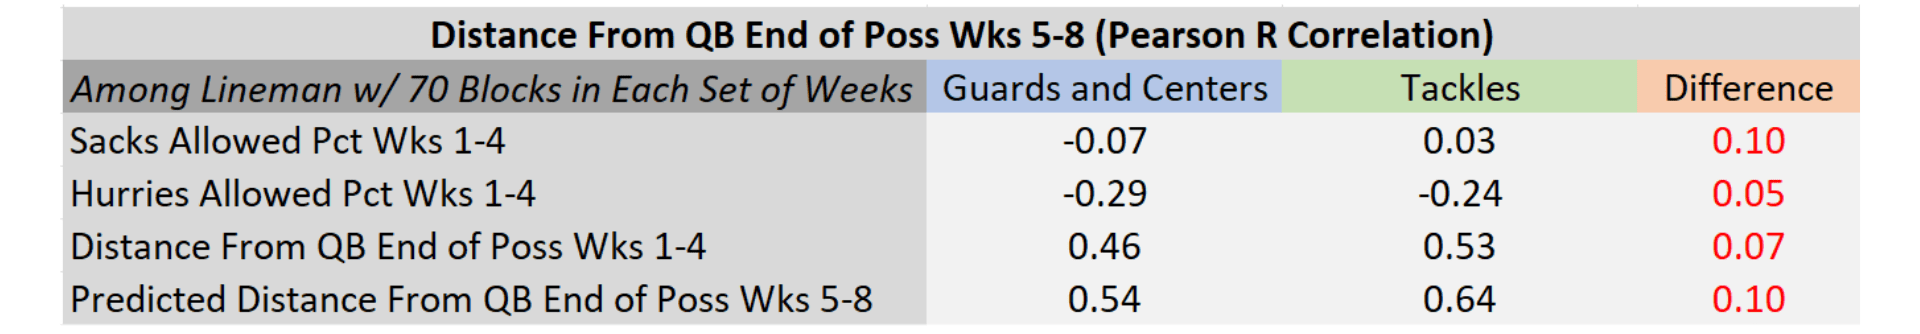

**<font size = "5" color = 'maroon'> Conclusion**

<font size = '4'> In order to make this analysis feasible, we had to eliminate many of the factors that make play on the offensive line so difficult to quantify. Some areas of improvement for our model include optimizing the shape of the OLIZ, dynamically sizing the OLIZ based other teammates' zones, and detecting/accounting for double teams. 
    
<font size = '4'> By leveraging strictly player tracking data, we were able to produce a more accurate, and perhaps the most accurate, predictor of distance from the quarterback yielded by their pass blockers. Our hope is that we've contributed, at least in some small way, to furthering the understanding of desirable skillsets at these positions.
    
<font size = '4'> Link To The Full GitHub Repository: [https://github.com/peterlmajors/FSAS_BigDataBowl_2023](http://)